In [1]:
#import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#load hourly data
hourly_data = pd.read_csv("datasets/hour.csv")
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
#summary statistic 
print(f"Shape of data: {hourly_data.shape}")
print(f"Number of missing values in the data: {hourly_data.isnull().sum()}")

Shape of data: (17379, 17)
Number of missing values in the data: instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [4]:
#so missing values are not included and further statistics
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


#So from the data, we can see the descriptions ,and divided into temporal_features, weather related features and record related features

#so let's prepreocessing the data


In [5]:
#so let's the features into human readable formats
#first let's copy the datasets

preprocessed_data = hourly_data.copy()

In [6]:
#season variable from numerical to nicely encodes categorical one
seasons_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: seasons_mapping[x])

In [7]:
#trasform year
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: yr_mapping[x])

In [8]:
#transform weekday
weekday_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x: weekday_mapping[x])

In [9]:
#weather transform
weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x: weather_mapping[x])

In [10]:
#transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed']*67

In [11]:
#so let's visualize preprocessed columns
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


In [12]:
#Let's analyze casual vs registered
"""
assert that total number of rides is equal to the sum of registered and casual ones

"""

assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(), 'Sum of casual and registered rides not equal to ' 'to total number of rides'

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


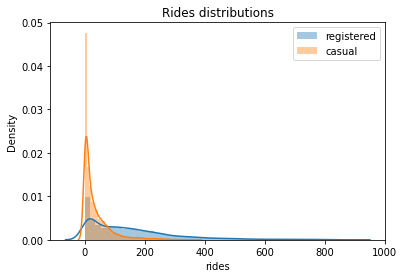

In [13]:
#so after varified with assert let's plot their distribution plot
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")
plt.savefig('datasets/saved_images/rides_distributions.png', format='png')

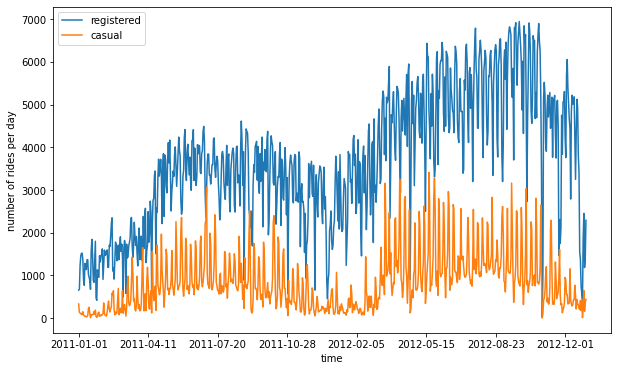

In [14]:
#now let's focus on the evolution of rides over time 
# analyze the number of rides each day 
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10, 6))
ax.set_xlabel('time');
ax.set_ylabel('number of rides per day');
plt.savefig('datasets/saved_images/rides_daily.png', format='png')

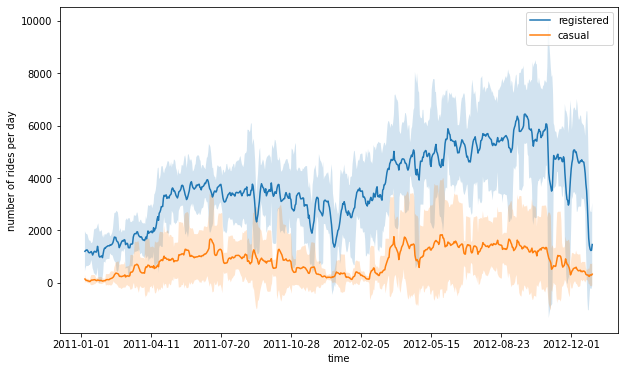

In [15]:
"""
Create new dataframe with necessary for plotting columns, and obtain number of rides per day, by groupying over each day

"""
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()

"""
define window for computing the rolling mean and standard deviation

"""
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

"""
Create a plot of series, where we first plot the series of rolling means, then color the zone between the series if rolling means +- 2 rolling standard deviations

"""
ax = rolling_means.plot(figsize=(10, 6))
ax.fill_between(rolling_means.index, rolling_means['registered'] + 2*rolling_deviations['registered'], rolling_means['registered'] - 2*rolling_deviations['registered'], alpha = 0.2)

ax.fill_between(rolling_means.index, rolling_means['casual'] + 2*rolling_deviations['casual'], rolling_means['casual'] - 2*rolling_deviations['casual'], alpha = 0.2)

ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.savefig("datasets/saved_images/rides_aggregated.png", format = 'png')


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


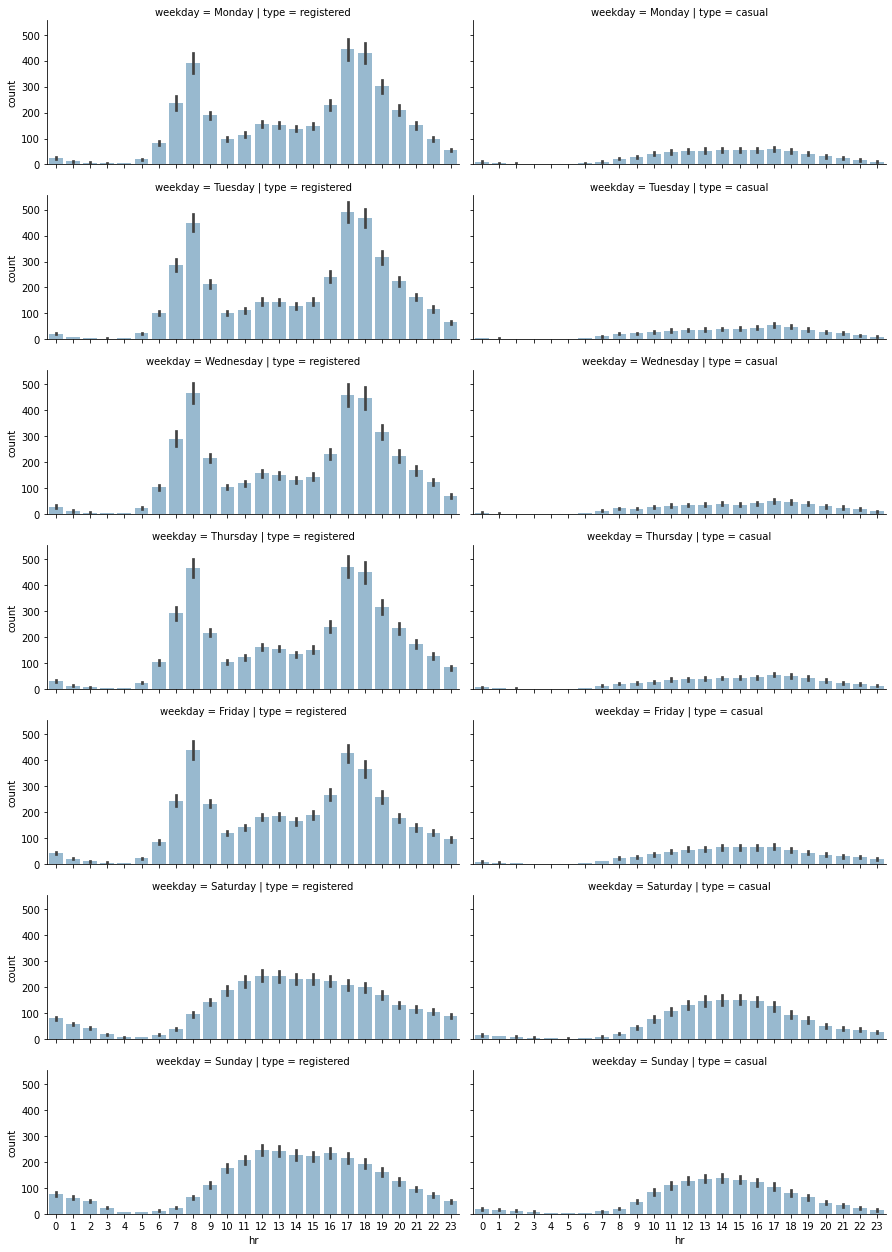

In [16]:
#now let's focus on the dist of the requests over separate hours and days of week
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]
"""
trasfrom thr data into a format, in number of entries are computed as count, for each distinct hr, weekday, and type (registered or casual)

"""
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], var_name='type', value_name='count')
"""
create facetgrid obj in which a grid plot is produces. As columns, we have the various days of the week, as rows, the different types(registered, casual)

"""
grid = sns.FacetGrid(plot_data, row='weekday', col='type', height=2.5, aspect=2.5, row_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
#populate the facetgrid with specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
grid.savefig('datasets/saved_images/weekday_hour_distributions.png', format='png')

In [17]:
# Analyzing Seasonal Impact on Rides
#select subset of the data
plot_data = preprocessed_data[['season', 'hr', 'registered', 'casual']]

In [18]:
#unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['hr', 'season'], var_name='type', value_name='count')

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


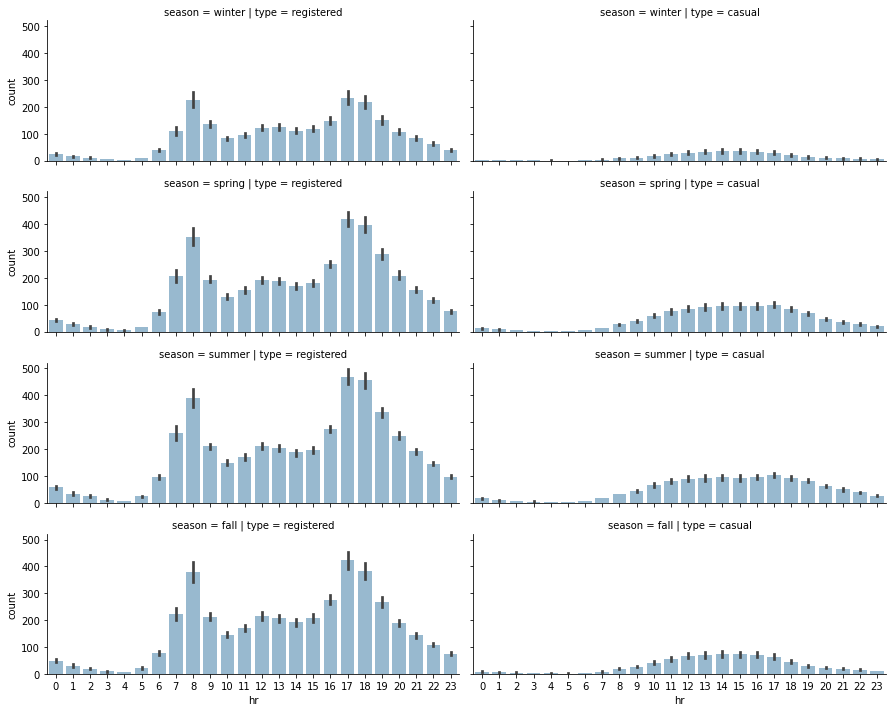

In [19]:
#define facetgrid
grid = sns.FacetGrid(plot_data, row='season', col='type', aspect=2.5, height=2.5, row_order=['winter', 'spring', 'summer', 'fall'])

#apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
#save fig
grid.savefig('datasets/saved_images/seasonal_impact.png', format='png')

In [20]:
#so now let's focus on weekday basis
plot_data = preprocessed_data[['weekday', 'season', 'registered', 'casual']]

plot_data = plot_data.melt(id_vars=['weekday', 'season'], var_name="type", value_name="count")

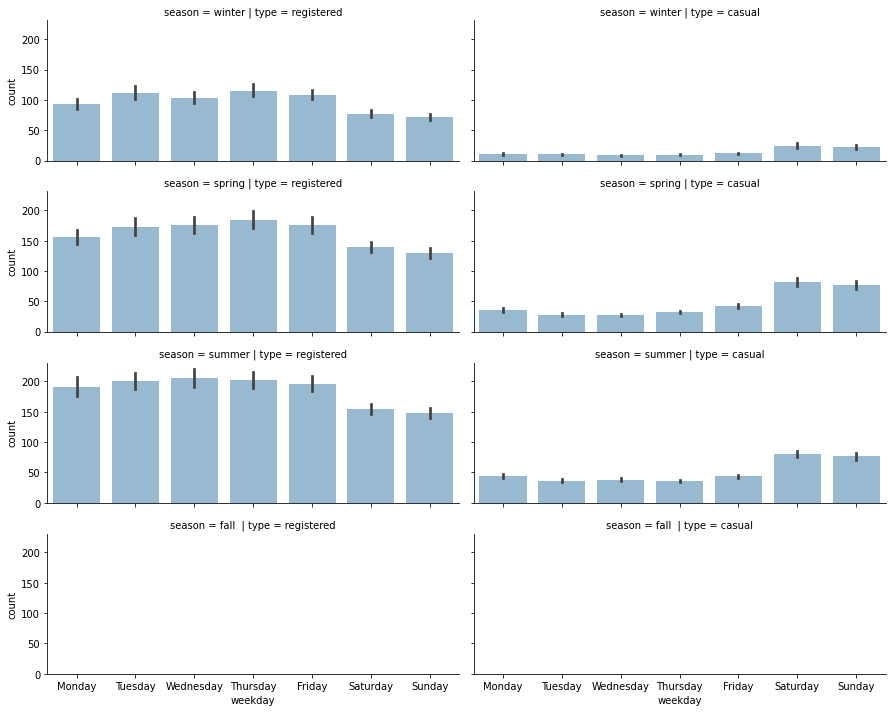

In [21]:
grid = sns.FacetGrid(plot_data, row="season", col="type", height=2.5, aspect=2.5, row_order=['winter', 'spring', 'summer', 'fall '])
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [22]:
#Hypothesis Testing
#Estimating avarage registered rides

#compute population mean of registered rides
population_mean = preprocessed_data.registered.mean()

In [23]:
#perform sample measurements for example register all the rides during the summer of 2011
#get sample of the data
sample = preprocessed_data[(preprocessed_data.season == "summer") & (preprocessed_data.yr == 2011)] .registered

In [24]:
#perform t-test and compute p-value
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample, population_mean)
print(f"Test stastic: {test_result[0]}, p-value: {test_result[1]}")

Test stastic: -3.491969148378619, p-value: 0.0004887645279519517


#so from the test result p-value smaller than 0.001 thus, we can reject null hypothesis and assume that the alternative hypothesis is correct.
# So why have you rejected the null hypothesis? The answer to that question lies in the fact that your sample is not a true representation of the population, but rather a biased one. In fact, you selected only entries from the summer of 2011. Therefore, neither data from the full year is present, nor entries from 2012. 

In [25]:
#In order to show how such mistakes can compromise the results of statistical tests, perform the test again, but this time taking as a sample 5% of the registered rides (selected randomly). 
import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, population_mean)
print(f"Unbiased test stastic: {test_result_unbiased[0]}, p-value: {test_result_unbiased[1]}")

Unbiased test stastic: -0.6754879357183804, p-value: 0.49954572178102596


#so from p-value is much larger than the critical 0.05 and thus we cannot reject the null hypothesis


In [26]:
#Hypothesis testing on registered rides
#define mask weekdays and weekend
weekend_days = ['Saturday', 'Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)

#select registered rides fo rhte weekend and working days

weekend_data = preprocessed_data.registered[weekend_mask]
workingdays_data = preprocessed_data.registered[workingdays_mask]

In [27]:
#perform t test
test_res = ttest_1samp(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]}, p-value: {test_res[1]}")

Statistic value: 47       79.243428
48       81.222175
49       81.881758
50       80.562593
51       62.753866
           ...    
17374    11.306433
17375    29.115160
17376    27.795995
17377    50.881381
17378    58.136788
Name: registered, Length: 12365, dtype: float64, p-value: [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 2.84357273e-158
 0.00000000e+000 0.00000000e+000]


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


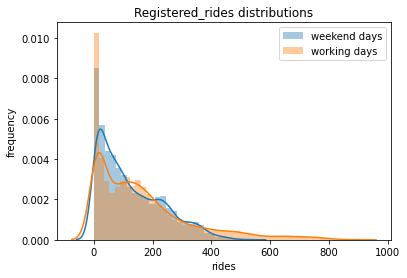

In [28]:
#so the resulting v-value from the test is less than 0.00001, far below the standard critical 0.05 value.so wwe can reject the null hypothesis

#now let's plot the registered rides 
sns.distplot(weekend_data, label="weekend days")
sns.distplot(workingdays_data, label="working days")
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered_rides distributions")
plt.savefig("datasets/saved_images/hypo_test.png", format='png')

In [29]:
#now here again on casual rides
weekend_data = preprocessed_data.casual[weekend_mask]
workingdays_data = preprocessed_data.casual[workingdays_mask]

#perform t test
test_tes = ttest_1samp(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]}, p-value: {test_res[1]}")

Statistic value: 47       79.243428
48       81.222175
49       81.881758
50       80.562593
51       62.753866
           ...    
17374    11.306433
17375    29.115160
17376    27.795995
17377    50.881381
17378    58.136788
Name: registered, Length: 12365, dtype: float64, p-value: [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 2.84357273e-158
 0.00000000e+000 0.00000000e+000]


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


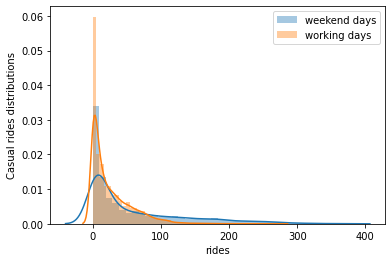

In [30]:
#now plot dist
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label="working days")
plt.legend()
plt.xlabel('rides')
plt.ylabel('Casual rides distributions')
plt.savefig('datasets/saved_images/casula_hypo.png', format='png')

In [31]:
#Analysis of Weather related features
#this time we use correlation
#get correlation between col and registered rides
def plot_correlations(data, col):
    corr_r = np.corrcoef(data[col], data['registered'])[0,1]
    ax = sns.regplot(x=col, y='registered', data = data, scatter_kws={"alpha": 0.05}, label=f"Registered Rides (correlation: {corr_r})")
#get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data['casual'])[0,1]
    ax = sns.regplot(x=col, y='casual', data=data, scatter_kws={"alpha": 0.05}, label=f"Casual rodes (correlation: {corr_c})")
    #adjust alpha legend
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
        ax.set_ylabel("rides")
        ax.set_title(f"Correlation betweeb rides and {col}")
        return ax

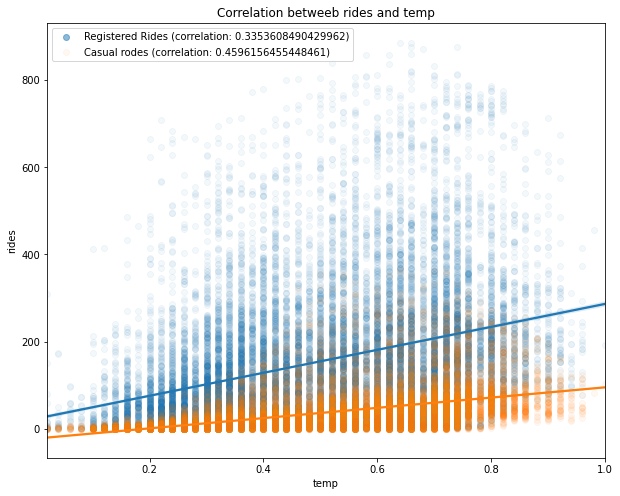

In [32]:
#applyint the previous defined functions to the four columns(temp, atemp, hum, windspeed)

plt.figure(figsize=(10, 8))
ax = plot_correlations(preprocessed_data, 'temp')
plt.savefig("datasets/saved_images/correlation_temp.png", format='png')

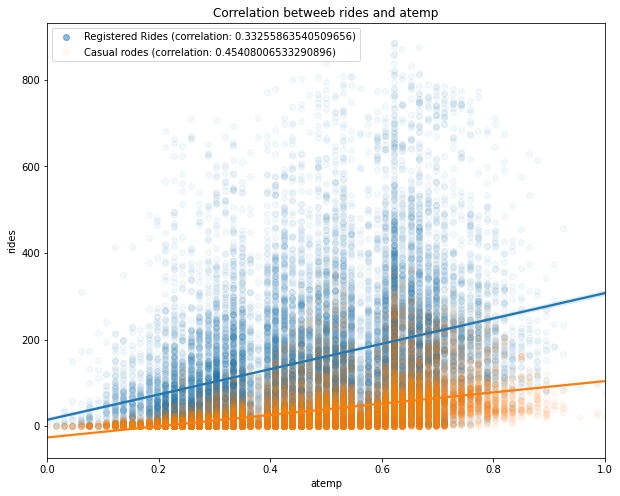

In [33]:
#atemp
plt.figure(figsize=(10, 8))
ax = plot_correlations(preprocessed_data, 'atemp')
plt.savefig("datasets/saved_images/correlation_atemp.png", format='png')

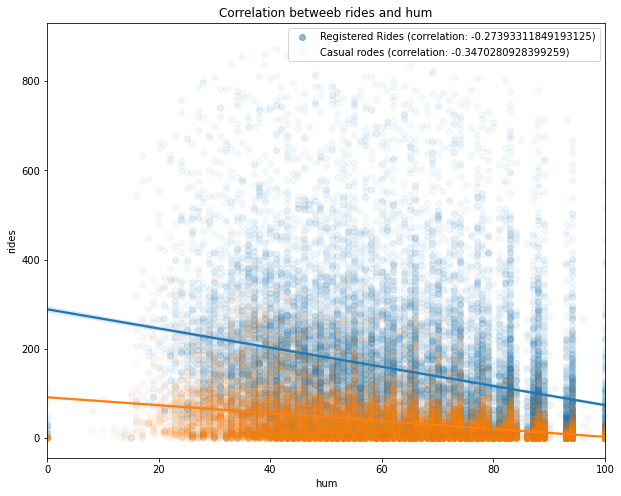

In [34]:
#humid
plt.figure(figsize=(10, 8))
ax = plot_correlations(preprocessed_data, 'hum')
plt.savefig("datasets/saved_images/correlation_humid.png", format='png')

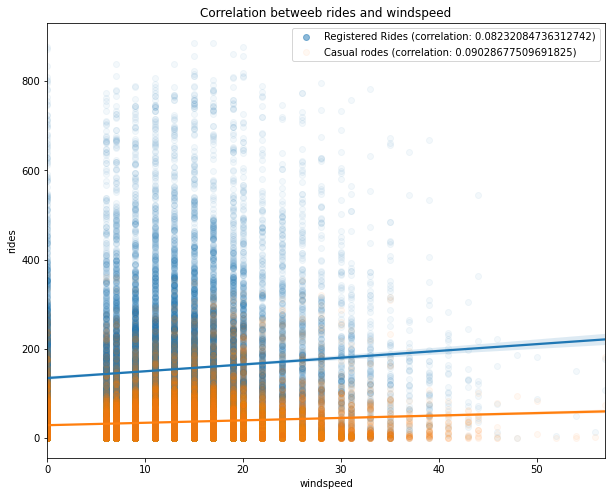

In [35]:
#windspeed
plt.figure(figsize=(10, 8))
ax = plot_correlations(preprocessed_data, 'windspeed')
plt.savefig("datasets/saved_images/correlation_windspeed.png", format='png')

In [36]:
#Evaluation difference between Pearson and Spearman correlation
#define random variables
x = np.linspace(0, 5, 100)
y_lin = 0.5*x + 0.1*np.random.randn(100)
y_mon = np.exp(x) + 0.1*np.random.randn(100)

In [37]:
#compute the pearson and spearman
from scipy.stats import pearsonr, spearmanr
corr_lin_pearson = pearsonr(x, y_lin)[0]
corr_lin_spearman = spearmanr(x, y_lin)[0]
corr_mon_pearson = pearsonr(x, y_mon)[0]
corr_mon_spearman = spearmanr(x, y_mon)[0]

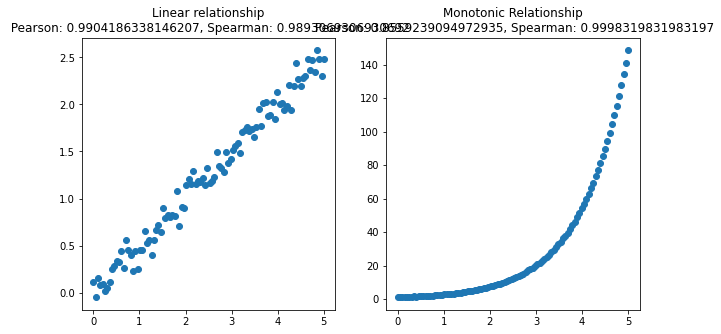

In [38]:
#visualize variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(x, y_lin)
ax1.set_title(f"Linear relationship\n Pearson: {corr_lin_pearson}, Spearman: {corr_lin_spearman}")
ax2.scatter(x, y_mon)
ax2.set_title(f"Monotonic Relationship\n Pearson: {corr_mon_pearson}, Spearman: {corr_mon_spearman}")
fig.savefig("datasets/saved_images/pear&spearcorr.png", format='png')


In [39]:
#now let return back again to bike sharing
def compute_correlation(data, col):

    pearson_reg = pearsonr(data[col], data['registered'])[0]
    spearman_reg = spearmanr(data[col], data['registered'])[0]
    pearson_cas = pearsonr(data[col], data['casual'])[0]
    spearman_cas = spearmanr(data[col], data['casual'])[0]

    return pd.Series({"Pearson (registered)": pearson_reg, "Spearman (registered)": spearman_reg, "Pearson (casual)": pearson_cas, "Spearman (casual)": spearman_cas})

In [40]:
#compute correlation measures 
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data =pd.DataFrame(index=["Pearson (registered)", "Spearman (registered)", "Pearson (casual)", "Spearman (casual)"])

for col in cols:
    corr_data[col] = compute_correlation(preprocessed_data, col)
corr_data.T

,Pearson (registered),Spearman (registered),Pearson (casual),Spearman (casual)
temp,0.335361,0.373196,0.459616,0.570989
atemp,0.332559,0.373014,0.454080,0.570419
hum,-0.273933,-0.338480,-0.347028,-0.388213
windspeed,0.082321,0.122936,0.090287,0.122920


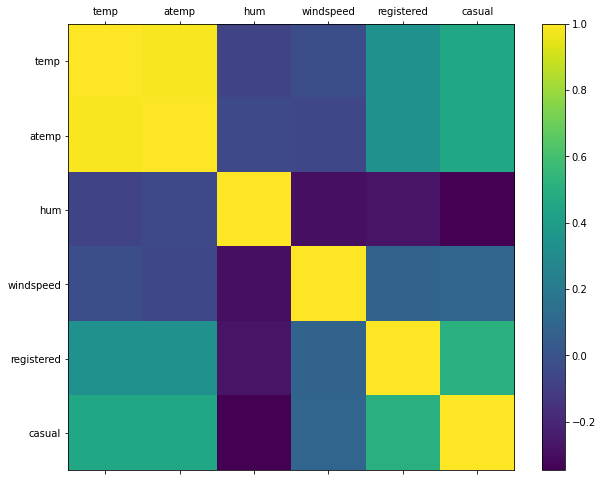

In [41]:
#plot correlation matrix
cols = ["temp", "atemp", "hum", "windspeed", "registered", "casual"]
plot_data = preprocessed_data[cols]
corr = plot_data.corr()

fig = plt.figure(figsize=(10, 8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])
fig.savefig("datasets/saved_images/correlation.png", format='png')

In [42]:
#Time series analysis
# get daily rides
daily_rides = preprocessed_data[["dteday", "registered", "casual"]]
daily_rides = daily_rides.groupby("dteday").sum()

# convert index to DateTime object
daily_rides.index = pd.to_datetime(daily_rides.index)

In [43]:
# define function for plotting rolling statistics and ADF test for time series
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts, window=10, **kwargs):
    # create dataframe for plotting
    plot_data = pd.DataFrame(ts)
    plot_data['rolling_mean'] = ts.rolling(window).mean()
    plot_data['rolling_std'] = ts.rolling(window).std()

    # compute p-value of Dickey-Fuller test
    p_val = adfuller(ts)[1]

    ax = plot_data.plot(**kwargs)
    ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")

<Figure size 432x288 with 0 Axes>

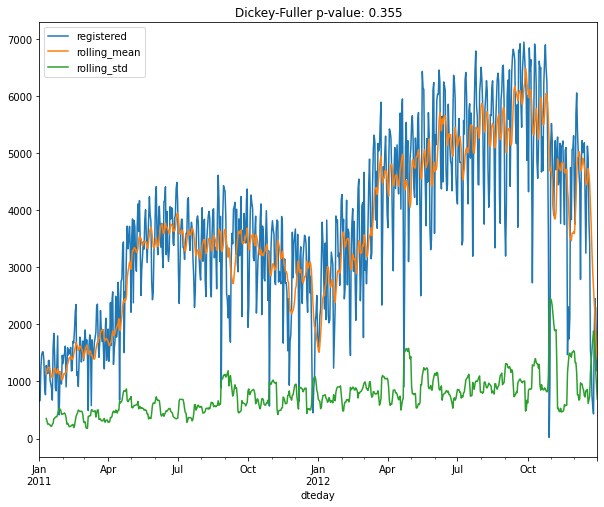

In [44]:
plt.figure()
test_stationarity(daily_rides["registered"], figsize=(10, 8))
plt.savefig('datasets/saved_images/daily_registered_original.png', format='png')

<Figure size 432x288 with 0 Axes>

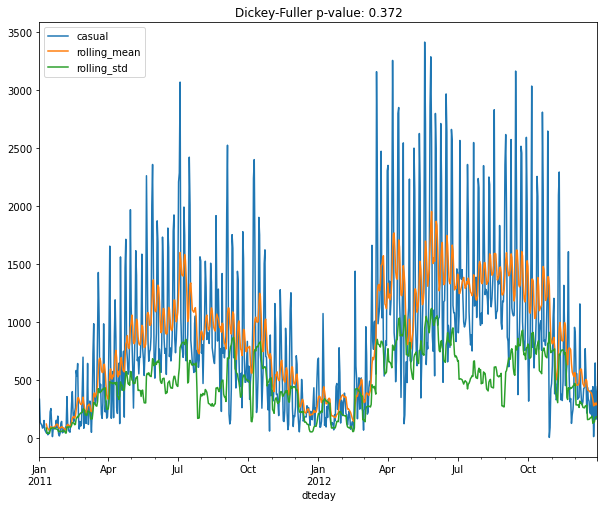

In [45]:
plt.figure()
test_stationarity(daily_rides['casual'], figsize=(10, 8))
plt.savefig("datasets/saved_images/daily_casual_original.png", format='png')

<Figure size 432x288 with 0 Axes>

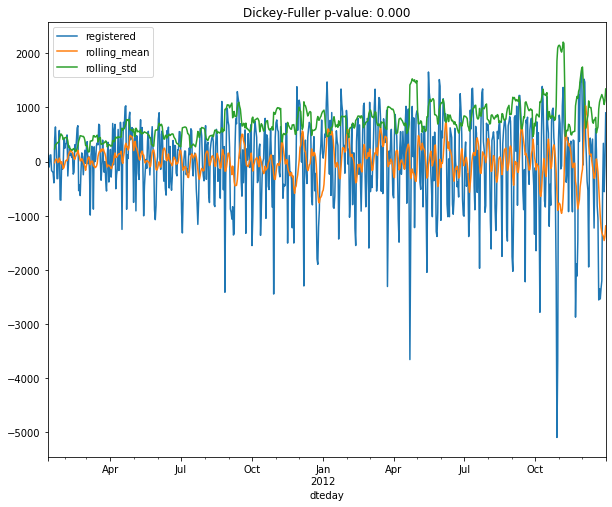

In [46]:
#subtract rolling mean
registered = daily_rides['registered']
registered_ma = registered.rolling(10).mean()

registered_ma_diff = registered - registered_ma
registered_ma_diff.dropna(inplace=True)

casual = daily_rides['casual']
casual_ma = casual.rolling(10).mean()
casual_ma_diff = casual - casual_ma
casual_ma_diff.dropna(inplace=True)

plt.figure()
test_stationarity(registered_ma_diff, figsize=(10,8))
plt.savefig("datasets/saved_images/sub_roll_reg.png", format='png')

<Figure size 432x288 with 0 Axes>

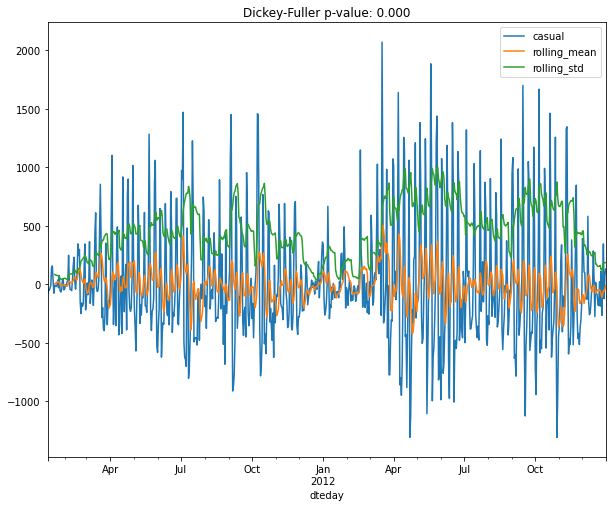

In [47]:
plt.figure()
test_stationarity(casual_ma_diff, figsize=(10,8))
plt.savefig("datasets/saved_images/sub_roll_casual.png", format='png')

<Figure size 432x288 with 0 Axes>

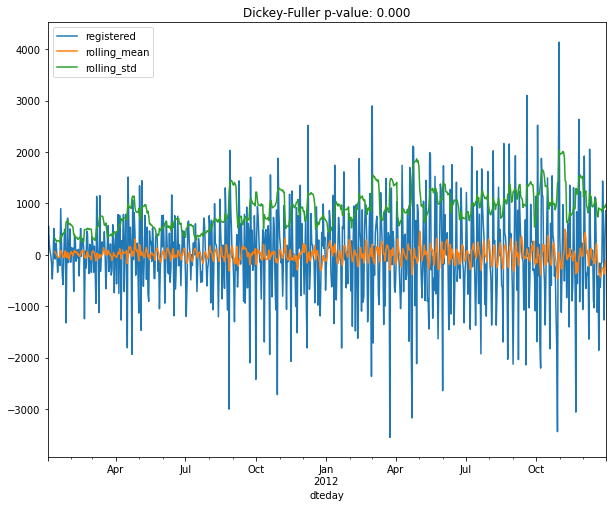

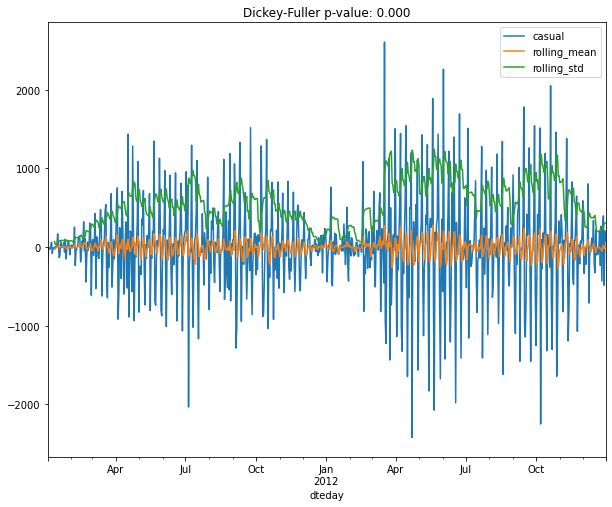

In [48]:
#subtract last value
registered = daily_rides['registered']
registered_diff = registered - registered.shift()
registered_diff.dropna(inplace=True)

casual = daily_rides['casual']
casual_diff = casual - casual.shift()
casual_diff.dropna(inplace=True)

plt.figure()
test_stationarity(registered_diff, figsize=(10, 8))
test_stationarity(casual_diff, figsize=(10, 8))

plt.savefig("datasets/saved_images/sub_last_reg.png", format='png')

plt.savefig("datasets/saved_images/sub_last_casual.png", format='png')



In [49]:
#Time series decomposition in trend, seasonality, residual components

from statsmodels.tsa.seasonal import seasonal_decompose
registered_decomposition = seasonal_decompose(daily_rides['registered'])
casual_decomposition = seasonal_decompose(daily_rides['casual'])

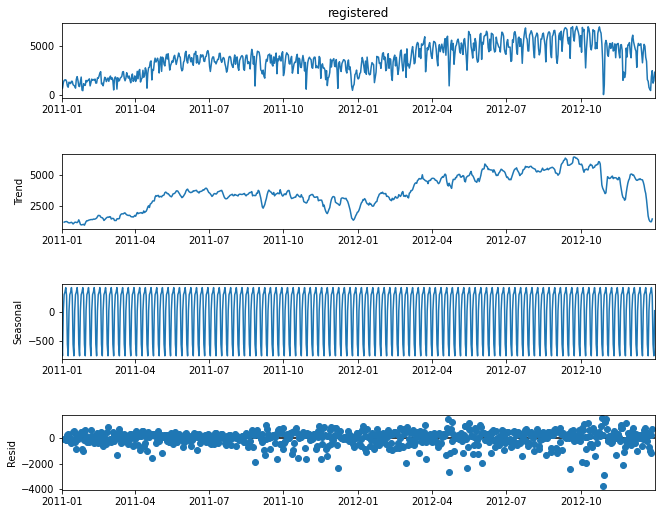

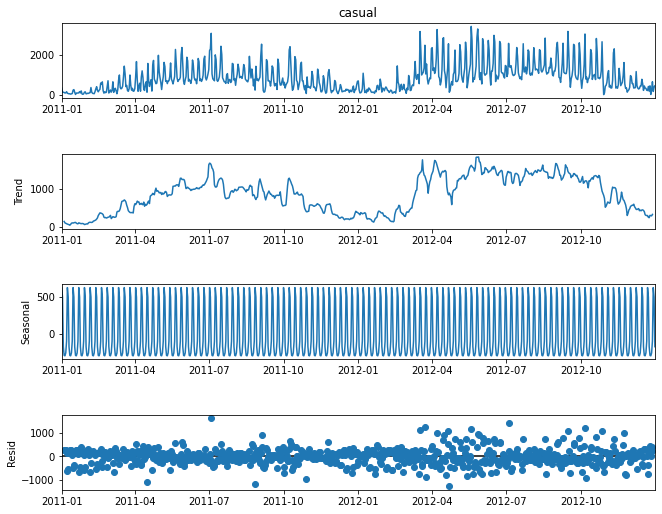

In [50]:
#plot the decomp
registered_plot = registered_decomposition.plot()
registered_plot.set_size_inches(10, 8)

casual_plot = casual_decomposition.plot()
casual_plot.set_size_inches(10, 8)

registered_plot.savefig("datasets/saved_images/registered_secomposition.png", format='png')
casual_plot.savefig("datasets/saved_images/casual_decomposition.png", format='png')

<Figure size 432x288 with 0 Axes>

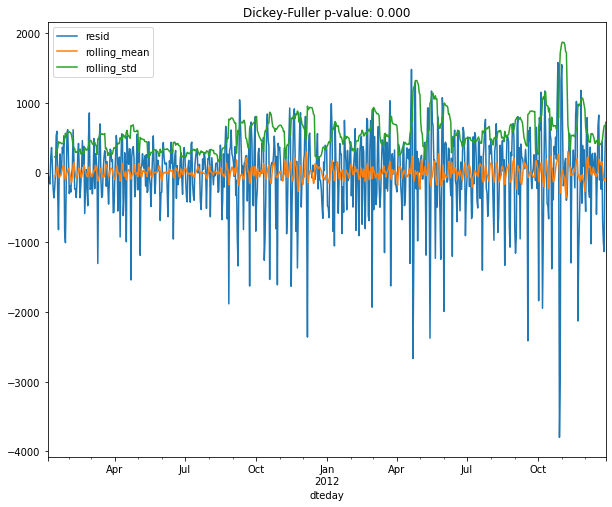

<Figure size 432x288 with 0 Axes>

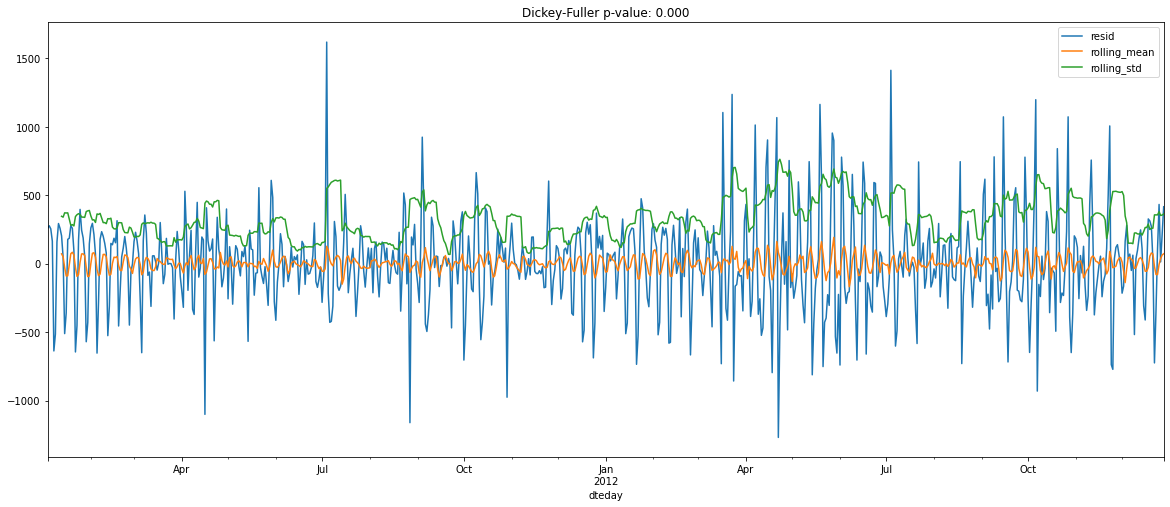

In [51]:
#test residuals for stationary
plt.figure()
test_stationarity(registered_decomposition.resid.dropna(), figsize=(10, 8))
plt.savefig("datasets/saved_images/registered_resid.png", format='png')

plt.figure()
test_stationarity(casual_decomposition.resid.dropna(), figsize=(20, 8))
plt.savefig("datasets/saved_images.casual_resid.png", format='png')

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


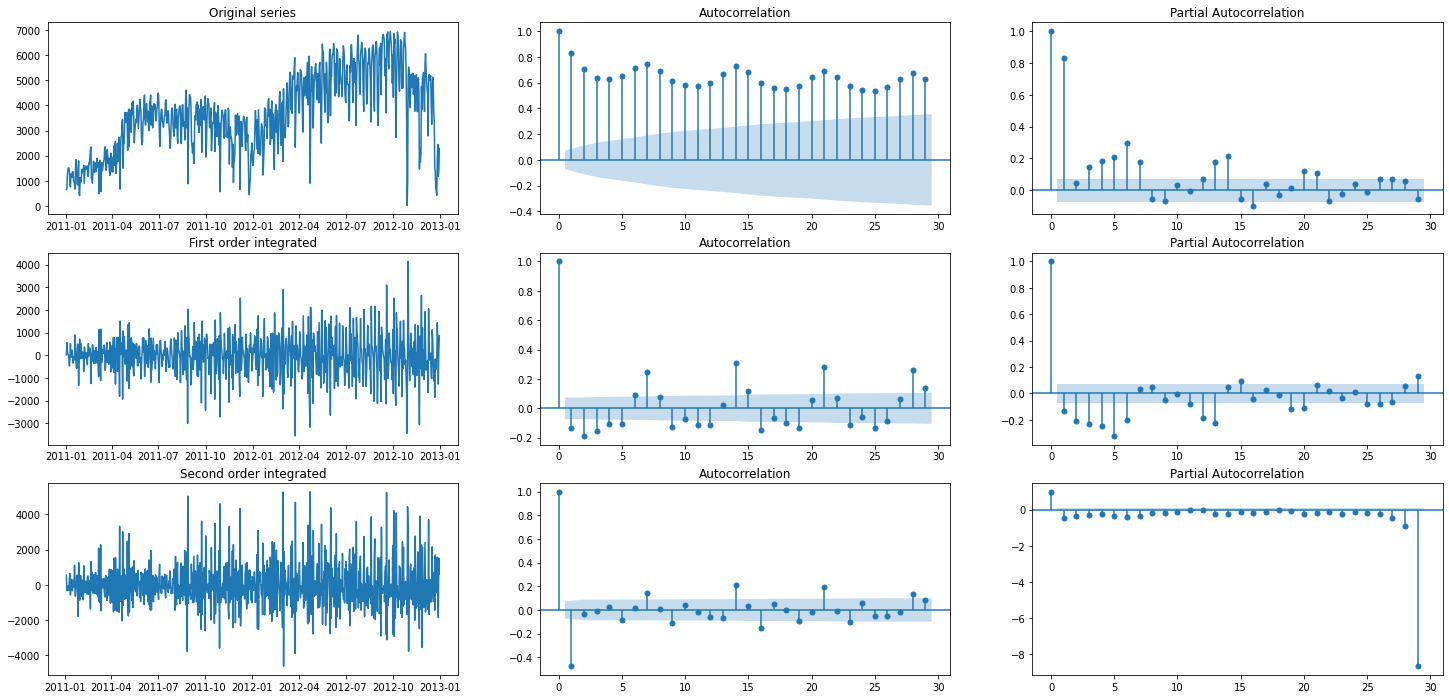

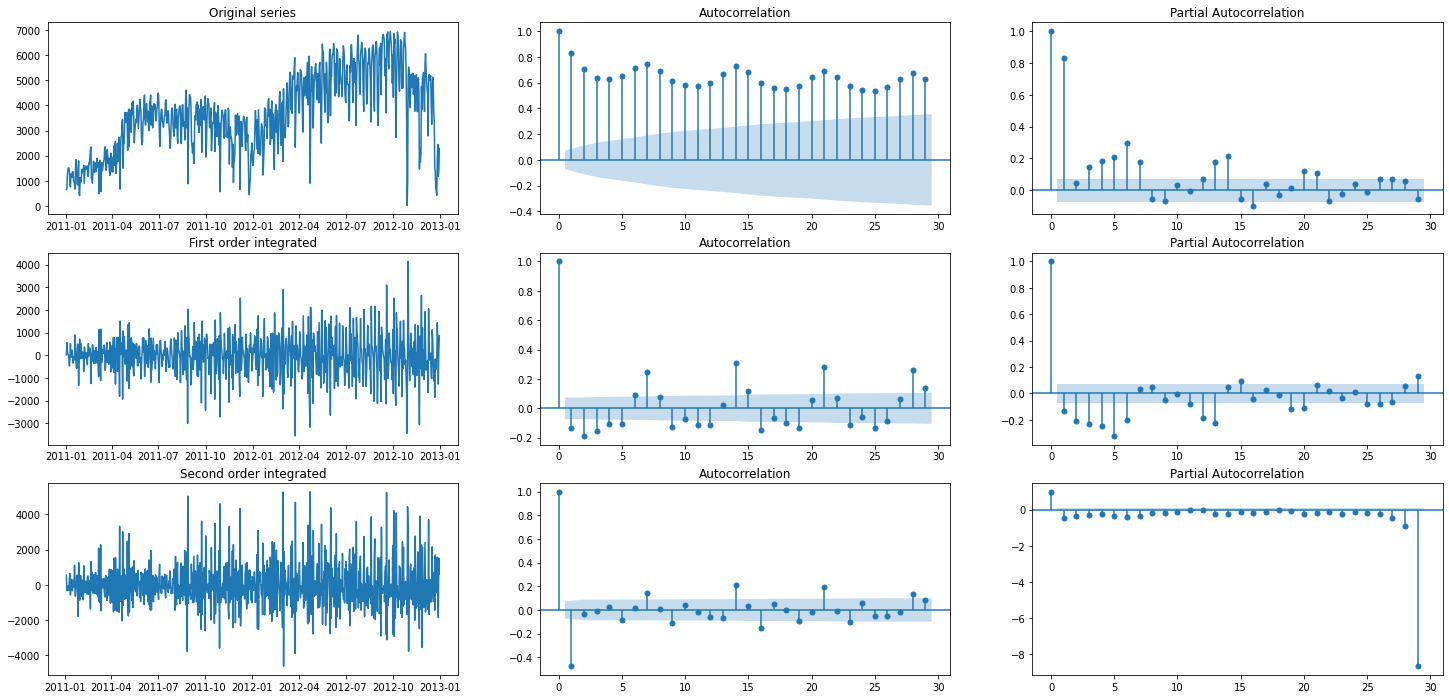

In [52]:
#ARIMA MODELS
#ACF AND PACF for registered rides
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(3, 3, figsize=(25, 12))

#plot original series
original = daily_rides['registered']
axes[0, 0].plot(original)
axes[0, 0].set_title("Original series")
plot_pacf(original, ax=axes[0,2])
plot_acf(original, ax=axes[0,1])

#plot first order integrated series
first_order_int = original.diff().dropna()
axes[1, 0].plot(first_order_int)
axes[1, 0].set_title("First order integrated")
plot_acf(first_order_int, ax=axes[1,1])
plot_pacf(first_order_int, ax=axes[1,2])

#plot second order integrated series
second_order_int = first_order_int.diff().dropna()
axes[2, 0].plot(second_order_int)
axes[2, 0].set_title("Second order integrated")
plot_acf(second_order_int, ax=axes[2,1])
plot_pacf(second_order_int, ax=axes[2,2])

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


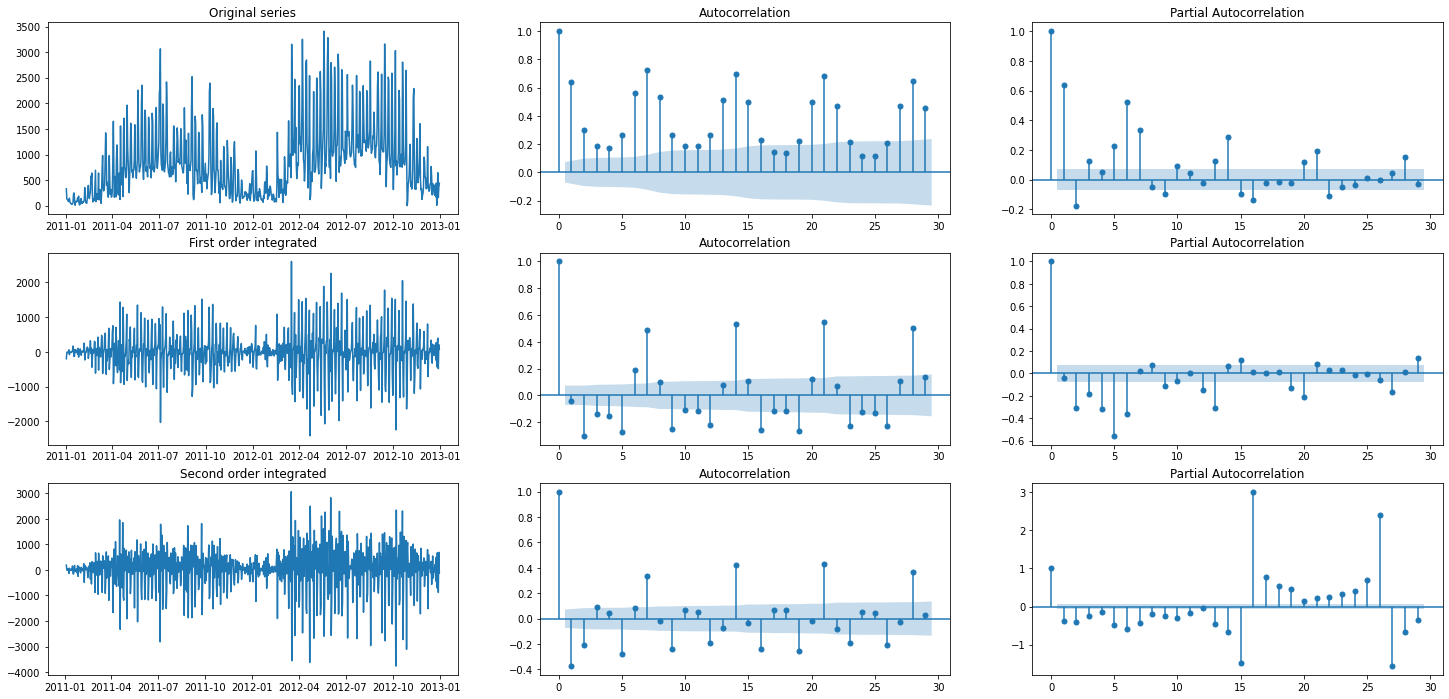

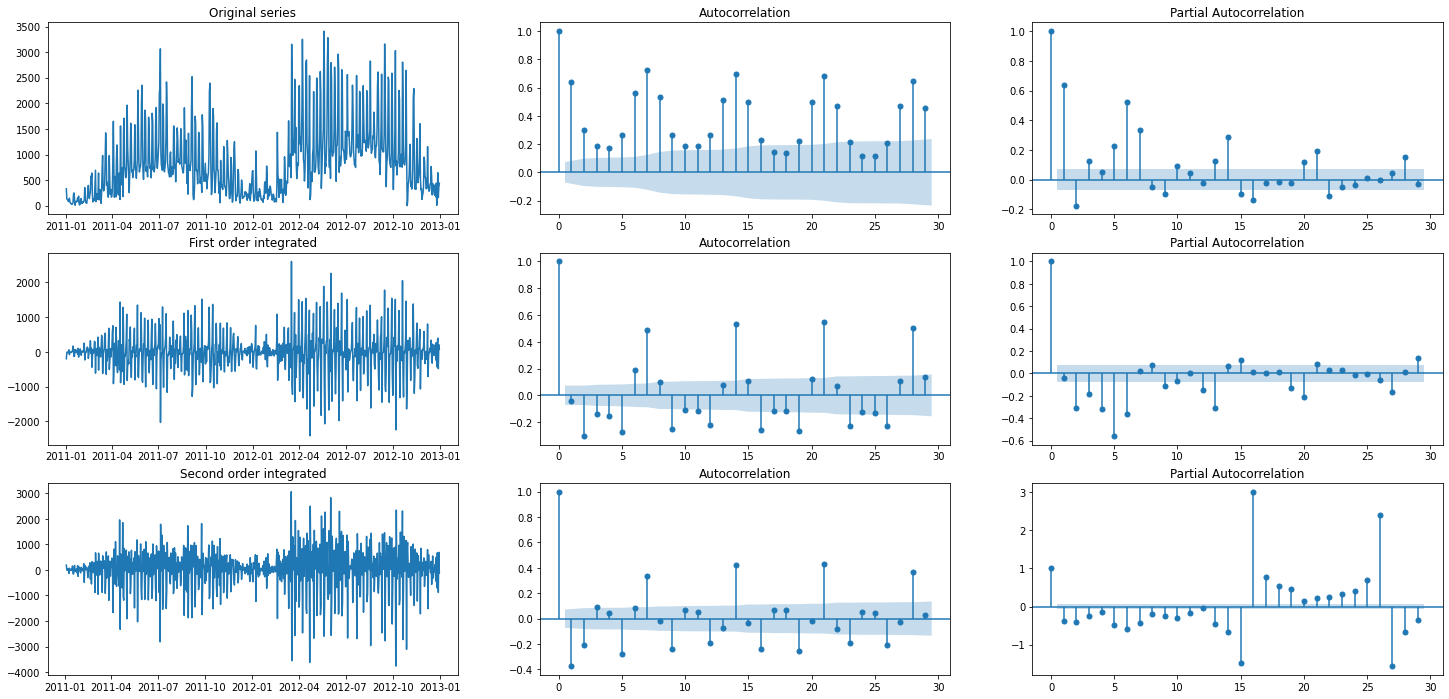

In [53]:
#ARIMA MODELS
#ACF AND PACF for casual rides
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(3, 3, figsize=(25, 12))

#plot original series
original = daily_rides['casual']
axes[0, 0].plot(original)
axes[0, 0].set_title("Original series")
plot_pacf(original, ax=axes[0,2])
plot_acf(original, ax=axes[0,1])

#plot first order integrated series
first_order_int = original.diff().dropna()
axes[1, 0].plot(first_order_int)
axes[1, 0].set_title("First order integrated")
plot_acf(first_order_int, ax=axes[1,1])
plot_pacf(first_order_int, ax=axes[1,2])

#plot second order integrated series
second_order_int = first_order_int.diff().dropna()
axes[2, 0].plot(second_order_int)
axes[2, 0].set_title("Second order integrated")
plot_acf(second_order_int, ax=axes[2,1])
plot_pacf(second_order_int, ax=axes[2,2])

In [54]:
#Akaike Information Criterion (AIC) Bayesian Information Criterion(BIC)
from pmdarima import auto_arima
model = auto_arima(registered, start_p=1, start_q=1, max_p=3, max_q=3, information_criterion="aic")
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -5854.497
Date:                Sun, 05 Sep 2021   AIC                          11722.995
Time:                        21:01:23   BIC                          11755.146
Sample:                             0   HQIC                         11735.399
                                - 731                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6066      0.050     32.379      0.000       1.509       1.704
ar.L2         -1.4461      0.062    -23.335      0.000      -1.568      -1.325
ar.L3          0.3597      0.049      7.370      0.0

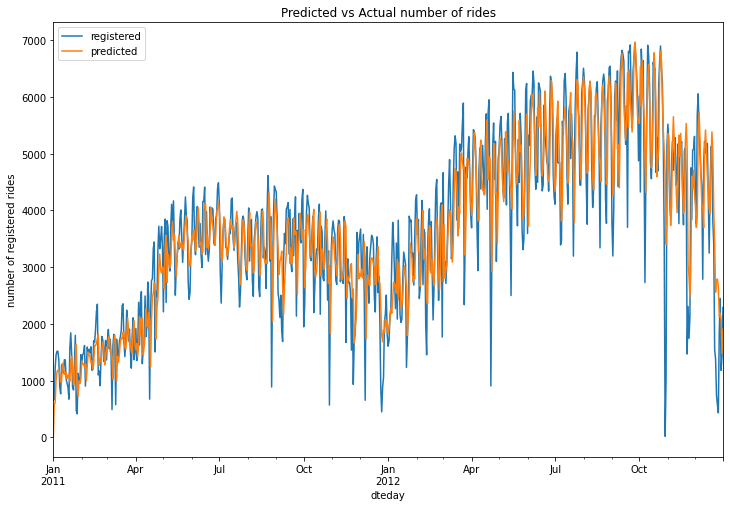

In [56]:
#plot original and predicted values
plot_data = pd.DataFrame(registered)
plot_data['predicted'] = model.predict_in_sample()
plot_data.plot(figsize=(12, 8))
plt.ylabel("number of registered rides")
plt.title("Predicted vs Actual number of rides")
plt.savefig("datasets/saved_images/registered_arima_fit.png", format='png')

In [58]:
#Akaike Information Criterion (AIC) Bayesian Information Criterion(BIC)
from pmdarima import auto_arima
model = auto_arima(casual, start_p=1, start_q=1, max_p=3, max_q=3, information_criterion="aic")
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -5448.382
Date:                Sun, 05 Sep 2021   AIC                          10910.765
Time:                        21:08:44   BIC                          10942.916
Sample:                             0   HQIC                         10923.169
                                - 731                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4262      0.050     28.257      0.000       1.327       1.525
ar.L2         -1.2209      0.062    -19.572      0.000      -1.343      -1.099
ar.L3          0.1818      0.049      3.686      0.0

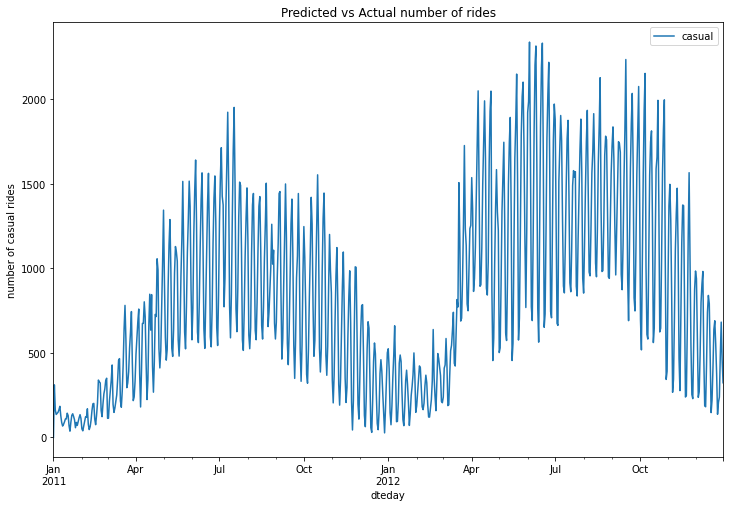

In [60]:
#plot original and predicted values
plot_data = pd.DataFrame(casual)
plot_data['casual'] = model.predict_in_sample()
plot_data.plot(figsize=(12, 8))
plt.ylabel("number of casual rides")
plt.title("Predicted vs Actual number of rides")
plt.savefig("datasets/saved_images/casual_arima_fit.png", format='png')